Here we use the first 100 samples in our dataset (core SO264-09-2) to demonstrate how to apply our model by using our package (nwp_cali.py).

# Import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nwp_cali import Quantify

# Import spectra data
We use part of the data from constructed database. For your own application, please go through `build_database series` (at least `build_database_01.ipynb`) to build a dataset having first 2048 columns as spectra.

In [2]:
spe_df = pd.read_csv('data/spe_dataset_20220629.csv', index_col=0).iloc[:100, :].copy()
spe_df

,0,1,2,3,4,5,6,7,8,9,...,2044,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename,section
composite_id,,,,,,,,,,,,,,,,,,,,,
SO264-09-2_00010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,174740,SO264-09-2,10,10,SO264-09-2_0000 10.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,176896,SO264-09-2,20,20,SO264-09-2_0000 20.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,183148,SO264-09-2,30,30,SO264-09-2_0000 30.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,185151,SO264-09-2,40,40,SO264-09-2_0000 40.0mm 10s 10kV 150uA No-F...,0
SO264-09-2_00050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,186255,SO264-09-2,50,50,SO264-09-2_0000 50.0mm 10s 10kV 150uA No-F...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO264-09-2_00970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,126038,SO264-09-2,970,270,SO264-09-2_0070 270.0mm 10s 10kV 150uA No-F...,1
SO264-09-2_00980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,126557,SO264-09-2,980,280,SO264-09-2_0070 280.0mm 10s 10kV 150uA No-F...,1
SO264-09-2_00990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,129976,SO264-09-2,990,290,SO264-09-2_0070 290.0mm 10s 10kV 150uA No-F...,1


# Scale the spectra
If your spectra are not yet scaled (sum=1 in each spectrum), you can use the function `ScaleX` in our package. But first, you need to initialize the class `Qantify` and asign which measurement you want to quantify for. The measurement parameter needs to be strings of CaCO3% or TOC%. Here we use CaCO3 as an example.

In [3]:
quan = Quantify(measurement='CaCO3%')
X = quan.ScaleX(spe_df)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Quantification
Now you can directly use `predict` function to quantify the CaCO3 contents from your scaled spectra. The output are already in wt%. Since the output is in a ndarray, you'll need to align it to whatever information you wish to have. Here we simply align it back to the input dataframe.

In [4]:
y = quan.predict(X)
y

array([ 47.40888222,  55.51026609,  69.12827988,  71.80083349,
        76.45829955,  73.16286772,  61.70687896,  68.69803962,
        60.95325234,  59.88122372,  58.26194932,  62.53936962,
        56.91920629,  58.04206958,  59.75292275,  56.74728797,
        58.27367412,  51.04299639,  53.59630997,  56.47802733,
        66.40702266,  68.17558272,  72.39141877,  69.58497989,
        81.23455947,  65.22067814,  82.58160679,  85.01538763,
        91.72655554,  91.98990029,  86.77435945,  92.12246247,
        92.80813979,  95.1472449 ,  87.96022042,  92.14465599,
        96.51939803, 101.0136189 ,  99.02140537,  96.17698687,
        98.76591721,  94.42663466,  87.18732919,  89.1948835 ,
        95.76928934,  74.21598633,  83.29794727,  83.03298412,
        65.76738491,  63.88260549,  55.74071498,  68.99505512,
        70.77935298,  83.84063374,  87.73806442,  84.522685  ,
        87.80546835,  88.1068118 ,  80.1239697 ,  79.70313183,
        86.19883189,  88.42826543,  76.25518918,  79.30

In [13]:
spe_df['CaCO3%'] = y
spe_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2045,2046,2047,cps,core,composite_depth_mm,section_depth_mm,filename,section,CaCO3%
composite_id,,,,,,,,,,,,,,,,,,,,,
SO264-09-2_00010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,174740,SO264-09-2,10,10,SO264-09-2_0000 10.0mm 10s 10kV 150uA No-F...,0,47.408882
SO264-09-2_00020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,176896,SO264-09-2,20,20,SO264-09-2_0000 20.0mm 10s 10kV 150uA No-F...,0,55.510266
SO264-09-2_00030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,183148,SO264-09-2,30,30,SO264-09-2_0000 30.0mm 10s 10kV 150uA No-F...,0,69.128280
SO264-09-2_00040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,185151,SO264-09-2,40,40,SO264-09-2_0000 40.0mm 10s 10kV 150uA No-F...,0,71.800833
SO264-09-2_00050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,186255,SO264-09-2,50,50,SO264-09-2_0000 50.0mm 10s 10kV 150uA No-F...,0,76.458300


# Visualzation
We also provide the 95% confident interval calculated from t-distribution to estimate the uncertainty of our quantification. This interval was calculated prior from the test set and case study. Details are in `build_models_11.ipynb`.

In [6]:
quan.print_CI()

Lower cutoff, Upper cutoff
[6.766615478157537, 5.910238821180132]


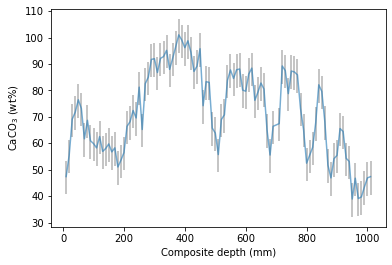

In [14]:
conf_int = [6.766615478157537, 5.910238821180132]

plt.errorbar(
    spe_df.composite_depth_mm, spe_df['CaCO3%'], 
    yerr = [np.repeat(conf_int[0], len(y)), np.repeat(conf_int[1], len(y))],
    alpha=.6, ecolor='grey')
plt.xlabel('Composite depth (mm)')
plt.ylabel('CaCO${_3}$ (wt%)');